In [29]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [30]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [31]:
len(xtrain)

60000

In [32]:
len(xtest)

10000

In [33]:
xtrain[0].shape

(28, 28)

In [34]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

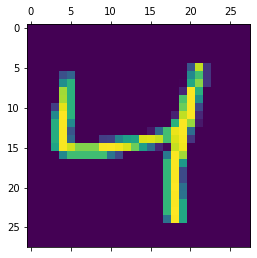

In [35]:
plt.matshow(xtrain[2]) 

In [36]:
ytrain[2]

4

In [37]:
ytrain[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [38]:
xtrain.shape

(60000, 28, 28)

In [39]:
xtrain=xtrain/255
xtest=xtest/255

In [40]:
xtrain_flatten=xtrain.reshape(len(xtrain),28*28)#60000,784
xtest_flatten=xtest.reshape(len(xtest),28*28)

In [41]:
xtrain_flatten.shape

(60000, 784)

In [42]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')#Dense layers are just lines connecting i/p and o/p and here 10 is o/p shape
])#sequential means having stack of many layers

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(xtrain_flatten,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4716 - accuracy: 0.8756
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3045 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.9200
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9256


In [43]:
model.evaluate(xtest_flatten,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2654 - accuracy: 0.9261


[0.26544883847236633, 0.9261000156402588]

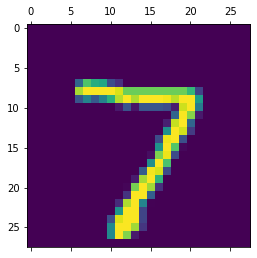

In [44]:
plt.matshow(xtest[0])

In [45]:
y_pred=model.predict(xtest_flatten)
y_pred[0]

array([2.0445853e-02, 5.1073192e-07, 7.6158762e-02, 9.6457827e-01,
       2.9577017e-03, 1.1888677e-01, 1.3387834e-06, 9.9980134e-01,
       1.1048651e-01, 7.0293736e-01], dtype=float32)

We want here whose value is maximum in above array because it gives the percentage of each class 

In [46]:
np.argmax(y_pred[0])

7

In [47]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [48]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    1,    0,    5,    5,    4,    3,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   3,    8,  930,   15,    7,    4,   12,   10,   39,    4],
       [   2,    0,   21,  920,    0,   25,    2,   12,   22,    6],
       [   2,    1,    8,    1,  916,    0,    5,    4,   10,   35],
       [   7,    2,    4,   34,    8,  782,    9,    6,   34,    6],
       [  11,    3,   11,    1,    8,   19,  900,    2,    3,    0],
       [   1,    5,   26,    5,    7,    0,    0,  953,    2,   29],
       [   4,    8,    7,   19,    9,   25,    7,   12,  877,    6],
       [   9,    7,    2,   11,   29,    6,    0,   25,    9,  911]])>

Text(69.0, 0.5, 'Truth')

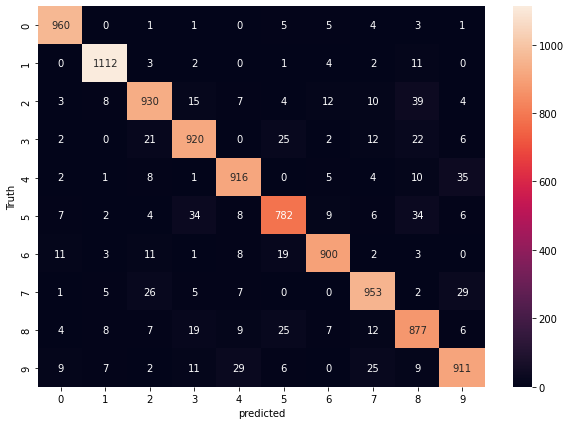

In [49]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')#It is correct only at diagonals

In [50]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),#here 1st i/p is number of neurons in hidden layer
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(xtrain_flatten,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2800 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1254 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0871 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0658 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0518 - accuracy: 0.9846


In [51]:
model.evaluate(xtest_flatten,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0761 - accuracy: 0.9767


[0.0760505422949791, 0.9767000079154968]

In [52]:
y_pred=model.predict(xtest_flatten)
y_pred_labels=[np.argmax(i) for i in y_pred]
cm=tf.math.confusion_matrix(labels=ytest,predictions=y_pred_labels)

Text(69.0, 0.5, 'Truth')

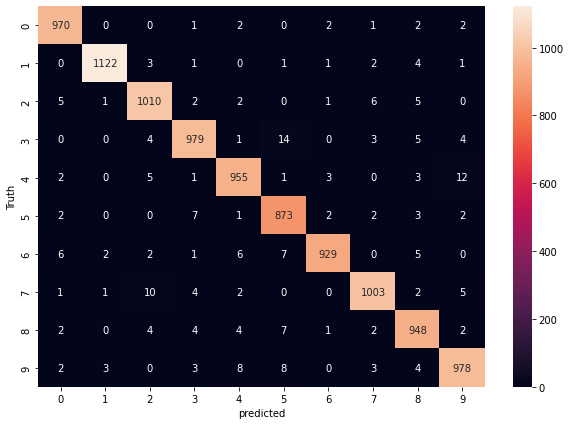

In [53]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')#It is correct only at diagonals

If we dont want to flatten the array,then there is a flatten layer in keras

# Also we use tensorboard here to tell how much our accruracy is going up/loss is going down

So we will have all the events record in logs directory of each epoch

In [57]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/',histogram_freq=1)

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(xtrain,ytrain,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6345 - accuracy: 0.8429
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3380 - accuracy: 0.9054
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2907 - accuracy: 0.9181
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2605 - accuracy: 0.9262
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2374 - accuracy: 0.9332


Now,we can either run above inline magic or go to git bash or  command prompt int this directory and type below to run it, tensorboard --logdir logs/ This will launch tensorboard at this url which you can open in browser http://localhost:6006/

# For opening tensorboard in jupyter notebook

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit#run this for launching tensorboard here 